In [1]:
%matplotlib inline
import numpy as np; np.random.seed(42)

import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append("../src/")
import matplotlib as mpl
from sgpi.plot import *
from sgpi.util import get_dataset, get_xy

In [69]:
def calculate_tsne(dataset, perplexity=30, random_state=42):
    df = get_dataset(dataset)
    X, y = get_xy(df)
    
    # Remove effect of variance, centering doesn't matter
    scaler = StandardScaler()
    X = scaler.fit_transform(X)  
    
    tsne = TSNE(perplexity=perplexity, init='pca', random_state=random_state)
    X = tsne.fit_transform(X, y)
    return X, y, df, dataset

def plot_tsne(data, continous, label=None, random_state=42):
    X, y, df, dataset = data
    x_1 = X[:,0]
    x_2 = X[:,1]
    fig, ax = plt.subplots(figsize=(fig_width, fig_width))
    if continous:
        cmap = mpl.colors.ListedColormap(sns.color_palette('Greens', 256))
        sc = ax.scatter(x_1, x_2, c=y, cmap=cmap, s=50)
        cb = fig.colorbar(sc, orientation='horizontal', pad=-0.1)
        if label is None:
            label = str(df.columns[-1])
        cb.set_label(label)
    else:   
        n_classes = y.max() + 1
        cmap = mpl.colors.ListedColormap(sns.color_palette('Paired', n_classes))
        sc = ax.scatter(x_1, x_2, c= y.astype(int), cmap=cmap, marker='o', s=10)
        #cbar_kws = {'boundaries': np.arange(0, n_classes)}
        cb = fig.colorbar(sc, orientation='horizontal', pad=0, boundaries=np.arange(0, n_classes), shrink=0.9)
        if label is None:
            label = str(df.columns[-1])
        cb.set_label(label)        
    ax.set(adjustable='box-forced', aspect='equal')
    ax.legend()
    ax.set_axis_off()
    fig.show()
    return fig, ax

In [56]:
concrete = calculate_tsne('concrete', perplexity=20, random_state=42)

In [7]:
plot_tsne(concrete, True, label='Compressive Strength')

NameError: name 'concrete' is not defined

In [42]:
power_plant = calculate_tsne('power_plant', perplexity=20, random_state=42)

KeyboardInterrupt: 

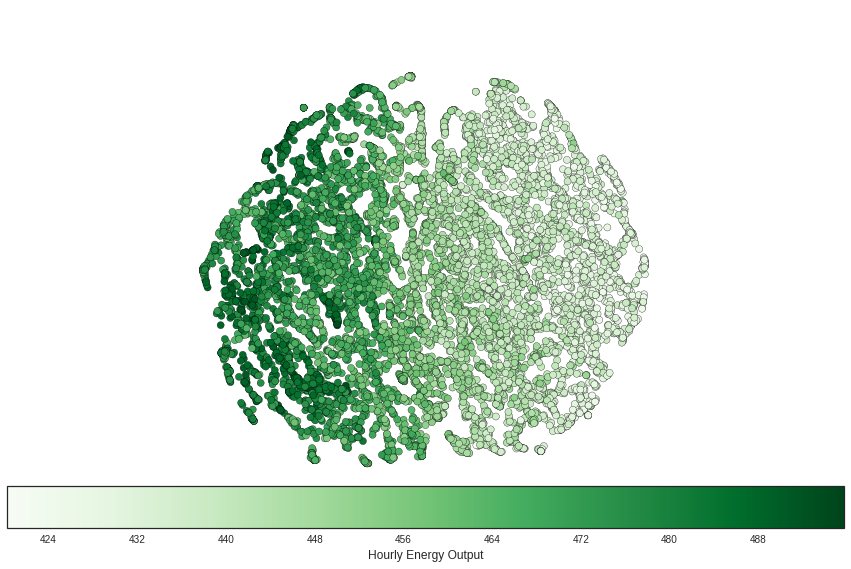

In [31]:
fig, ax = plot_tsne(power_plant, True, label="Hourly Energy Output")
fig.savefig("../writing/thesis/figures/tsne_power_plant.pdf", bbox='tight', bbox_inches='tight')

In [16]:
df = get_dataset('power_plant')
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,0.482109,0.613193,0.573866,0.547000,454.365009
std,0.211336,0.208368,0.141631,0.213982,17.066995
min,0.000000,0.000000,0.000000,0.000000,420.260000
25%,0.305635,0.404908,0.477527,0.386285,439.750000
50%,0.496882,0.598390,0.572410,0.553358,451.550000
75%,0.653168,0.817301,0.672908,0.713869,468.430000
max,1.000000,1.000000,1.000000,1.000000,495.760000


/home/lukaskrenz/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/lukaskrenz/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


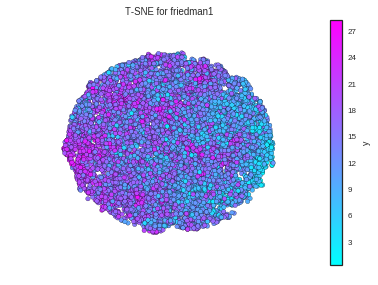

In [5]:
plot_tsne('friedman1', True)

In [62]:
optdigits = calculate_tsne('optdigits_train', perplexity=20, random_state=42)

KeyboardInterrupt: 

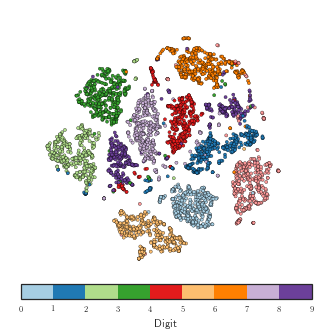

In [71]:
fig, ax = plot_tsne(optdigits, False, label='Digit')
fig.savefig("../writing/thesis/figures/tsne_optdigits.pdf", bbox='tight', bbox_inches='tight')

In [15]:
palette = mpl.colors.ListedColormap(sns.color_palette('Dark2', 10))


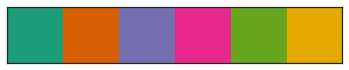

In [20]:
sns.palplot(sns.color_palette('Dark2'))

In [23]:
df = get_dataset('optdigits_sub_train')
_, y = get_xy(df)
y

array([7, 2, 7, ..., 9, 9, 7])

10